<a href="https://colab.research.google.com/github/sujankumarjana/Marchandise-Sales-Analysis/blob/main/Merchandise_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Merch_sales.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


In [ ]:
# Check for missing values
df.isnull().sum()

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check data types
df.dtypes

,0
Order ID,int64
Order Date,datetime64[ns]
Product ID,object
Product Category,object
Buyer Gender,object
Buyer Age,int64
Order Location,object
International Shipping,object
Sales Price,int64
Shipping Charges,int64


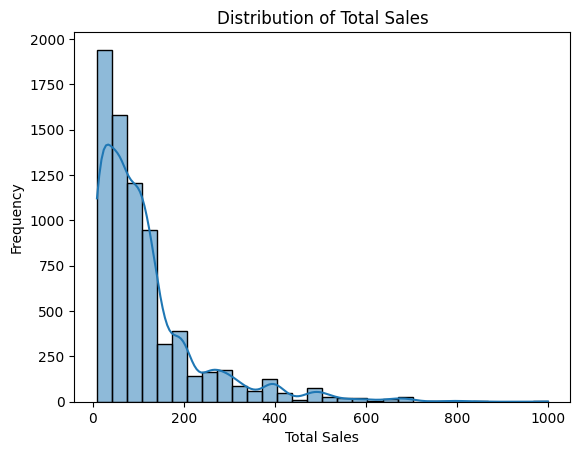

In [ ]:
# Plot the distribution of total sales
sns.histplot(df['Total Sales'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

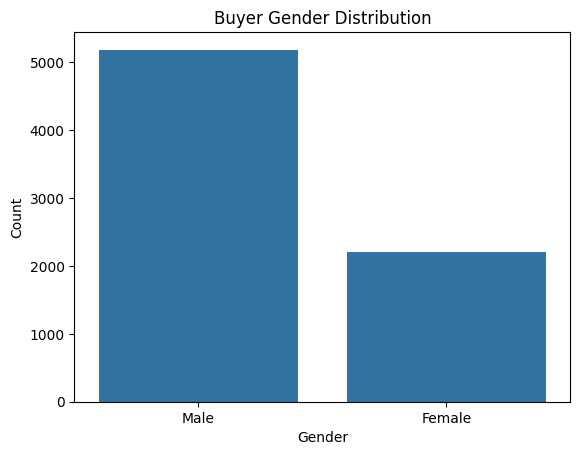

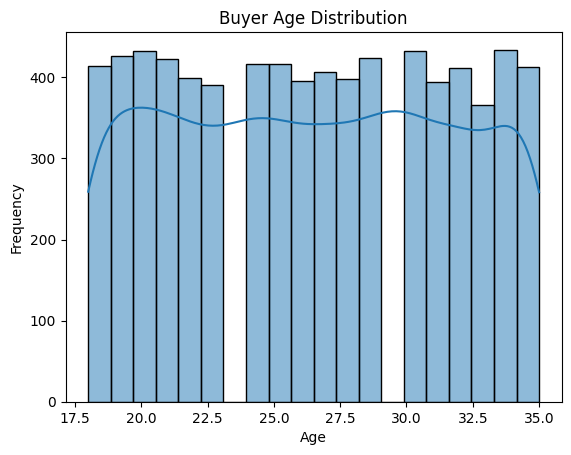

In [ ]:
# Gender distribution
sns.countplot(x='Buyer Gender', data=df)
plt.title('Buyer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age distribution
sns.histplot(df['Buyer Age'], bins=20, kde=True)
plt.title('Buyer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

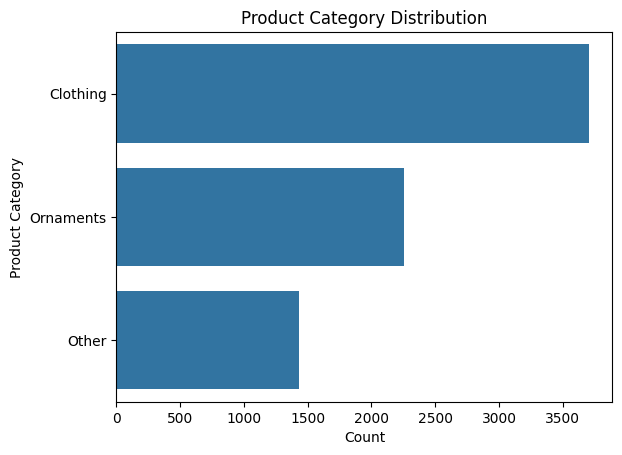

In [ ]:
# Product category distribution
sns.countplot(y='Product Category', data=df, order=df['Product Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

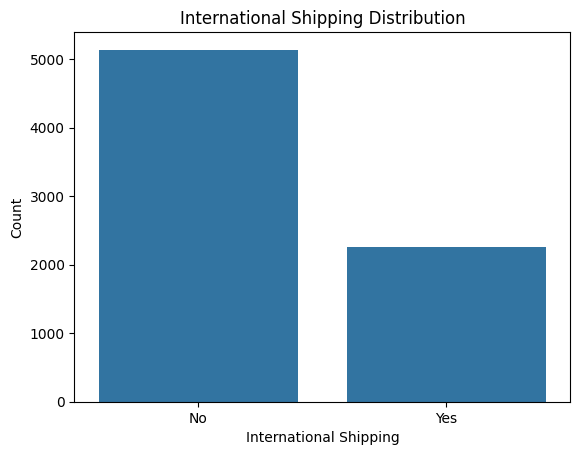

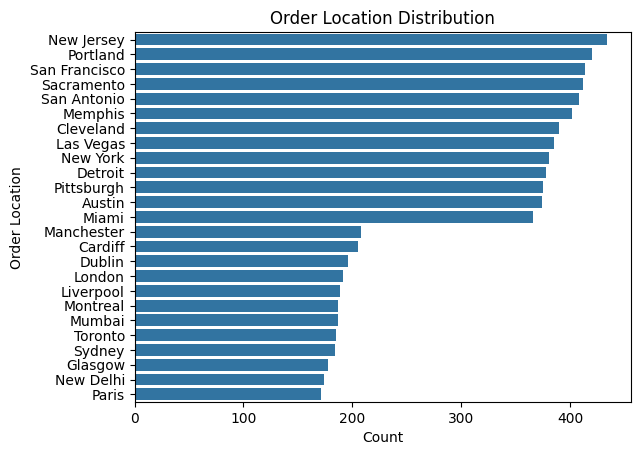

In [ ]:
# International shipping distribution
sns.countplot(x='International Shipping', data=df)
plt.title('International Shipping Distribution')
plt.xlabel('International Shipping')
plt.ylabel('Count')
plt.show()

# Order location distribution
sns.countplot(y='Order Location', data=df, order=df['Order Location'].value_counts().index)
plt.title('Order Location Distribution')
plt.xlabel('Count')
plt.ylabel('Order Location')
plt.show()

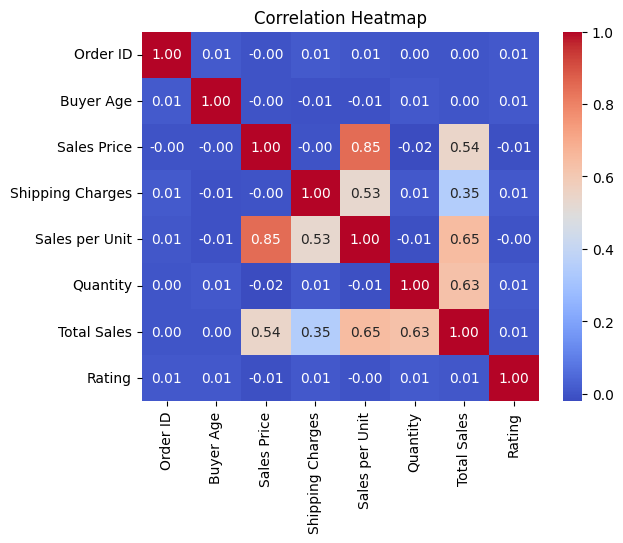

In [ ]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

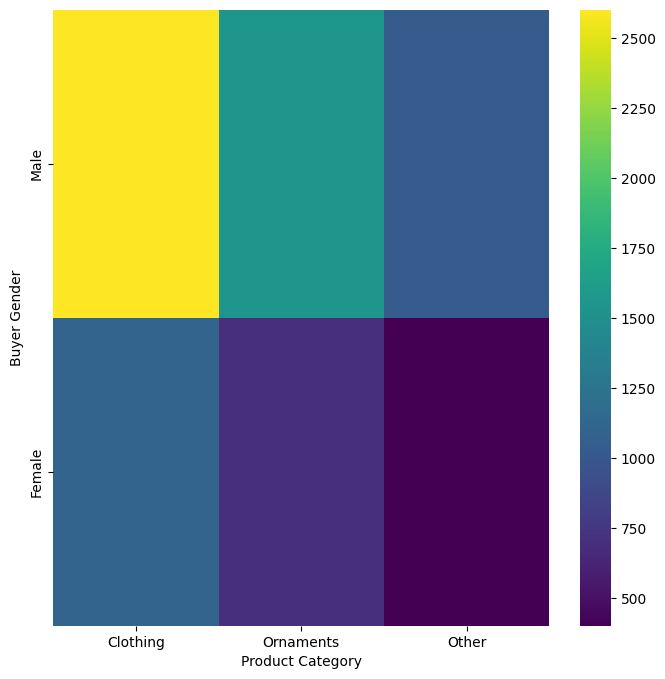

In [ ]:
# @title Product Category vs Buyer Gender

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Buyer Gender'].value_counts()
    for x_label, grp in df.groupby('Product Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Product Category')
_ = plt.ylabel('Buyer Gender')